### Breadth-First Search 广度优先搜索

In [3]:
from enum import Enum
from queue import Queue, PriorityQueue
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Action(Enum):
    """
    An action is represented by a 3 element tuple.
    
    The first 2 values are the delta of the action relative
    to the current grid position. The third and final value
    is the cost of performing the action.
    """
    LEFT = (0, -1, 1)
    RIGHT = (0, 1, 1)
    UP = (-1, 0, 1)
    DOWN = (1, 0, 1)
    
    def __str__(self):
        if self == self.LEFT:
            return '<'
        elif self == self.RIGHT:
            return '>'
        elif self == self.UP:
            return '^'
        elif self == self.DOWN:
            return 'v'
        
    @property   
    def cost(self):
        return self.value[2]
    
    @property
    def delta(self):
        return (self.value[0], self.value[1])

def valid_actions(grid, current_node):
    """
    Returns a list of valid actions given a grid and current node.
    """
    valid = [Action.UP, Action.LEFT, Action.RIGHT, Action.DOWN]
    n, m = grid.shape[0] - 1, grid.shape[1] - 1
    x, y = current_node
    
    # check if the node is off the grid or
    # it's an obstacle
    
    if x - 1 < 0 or grid[x-1, y] == 1:
        valid.remove(Action.UP)
    if x + 1 > n or grid[x+1, y] == 1:
        valid.remove(Action.DOWN)
    if y - 1 < 0 or grid[x, y-1] == 1:
        valid.remove(Action.LEFT)
    if y + 1 > m or grid[x, y+1] == 1:
        valid.remove(Action.RIGHT)
        
    return valid

def visualize_path(grid, path, start):
    """
    Given a grid, path and start position
    return visual of the path to the goal.
    
    'S' -> start 
    'G' -> goal
    'O' -> obstacle
    ' ' -> empty
    """
    sgrid = np.zeros(np.shape(grid), dtype=np.str)
    sgrid[:] = ' '
    sgrid[grid[:] == 1] = 'O'
    
    pos = start
    
    for a in path:
        da = a.value
        sgrid[pos[0], pos[1]] = str(a)
        pos = (pos[0]+da[0], pos[1]+da[1])
    sgrid[pos[0], pos[1]] = 'G'
    sgrid[start[0], start[1]] = 'S'
    return sgrid

##### Cost Search

In this section you will extend the breadth-first search algorithm by incorporating a cost for each action. Your task is to compute the lowest cost path.

In [3]:
def uniform_cost(grid, start, goal):
    
    # TODO: Initialize the starting variables
    path = []
    queue = PriorityQueue()
    queue.put((0, start))
    visited = set(start)
    branch = {}
    found = False
    
    while not queue.empty():
        # TODO: Remove the first element from the queue
        item = queue.get()
        current_cost = item[0]
        current_node = item[1]
        
        # TODO: Check if the current vertex corresponds to the goal state
        # and set `found` to True if that's the case.
        if current_node == goal:
            print('Found a path.')
            found = True
            break
        else:
            for action in valid_actions(grid, current_node):
                # get the tuple representation
                da = action.delta
                cost = action.cost
                #next_node = (current_node[0] + da[0], current_node[1] + da[1])
                next_node = (current_node[0] + da[0], current_node[1] + da[1]) 
                new_cost = current_cost + cost
                # TODO: Check if the new vertex has not been visited before.
                # If the node has not been visited you will need to
                # 1. Mark it as visited
                # 2. Add it to the queue
                if next_node not in visited:
                    visited.add(next_node)
                    queue.put((new_cost, next_node))
                    
                    branch[next_node] = (new_cost, current_node, action)
                    
    path = []
    path_cost = 0
    if found:
        # retrace steps
        path = []
        n = goal
        path_cost = branch[n][0]
        
        while branch[n][1] != start:
            path.append(branch[n][2])
            n = branch[n][1]
        path.append(branch[n][2])
        
    return path[::-1], path_cost
    

In [4]:
# Define your breadth-first search function here
def breadth_first(grid, start, goal):

    # TODO: Replace the None values for 
        # "queue" and "visited" with data structure objects
        # and add the start position to each 
    queue = Queue()
    queue.put(start)
    visited = set()
    visited.add(start)
    branch = {}
    found = False
    
    # Run loop while queue is not empty
    while not queue.empty(): # TODO: replace True with q.empty():
        # TODO: Replace "None" to remove the 
            #first element from the queue
        current_node = queue.get()
        
        # TODO: Replace "False" to check if the current 
            # node corresponds to the goal state
        if current_node == goal: 
            print('Found a path.')
            found = True
            break
        else:
            # TODO: Get the new nodes connected to the current node
            # Iterate through each of the new nodes and:
            # If the node has not been visited you will need to
            # 1. Mark it as visited
            # 2. Add it to the queue
            # 3. Add how you got there to the branch dictionary 
            for a in valid_actions(grid, current_node):
                da = a.value
                next_node = (current_node[0] + da[0], current_node[1] + da[1])
                if next_node not in visited:
                    visited.add(next_node)
                    queue.put(next_node)
                    branch[next_node] = (current_node, a)
    
    # Now, if you found a path, retrace your steps through 
    # the branch dictionary to find out how you got there!
    path = []
    if found:
        # retrace steps
        path = []
        n = goal
        while branch[n][0] != start:
            path.append(branch[n][1])
            n = branch[n][0]
        path.append(branch[n][1])
            
    return path[::-1]

In [5]:
def a_star(grid, h, start, goal):

    path = []
    path_cost = 0
    queue = PriorityQueue()
    queue.put((0, start))
    visited = set(start)

    branch = {}
    found = False
    
    while not queue.empty():
        item = queue.get()
        current_node = item[1]
        if current_node == start:
            current_cost = 0.0
        else:              
            current_cost = branch[current_node][0]
            
        if current_node == goal:        
            print('Found a path.')
            found = True
            break
        else:
            for action in valid_actions(grid, current_node):
                # get the tuple representation
                da = action.delta
                next_node = (current_node[0] + da[0], current_node[1] + da[1])
                branch_cost = current_cost + action.cost
                queue_cost = branch_cost + h(next_node, goal)
                
                if next_node not in visited:                
                    visited.add(next_node)               
                    branch[next_node] = (branch_cost, current_node, action)
                    queue.put((queue_cost, next_node))
             
    if found:
        # retrace steps
        n = goal
        path_cost = branch[n][0]
        path.append(goal)
        while branch[n][1] != start:
            path.append(branch[n][1])
            n = branch[n][1]
        path.append(branch[n][1])
    else:
        print('**********************')
        print('Failed to find a path!')
        print('**********************') 
    return path[::-1], path_cost


In [6]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil(north_max - north_min))
    east_size = int(np.ceil(east_max - east_min))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])

    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1

    return grid

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


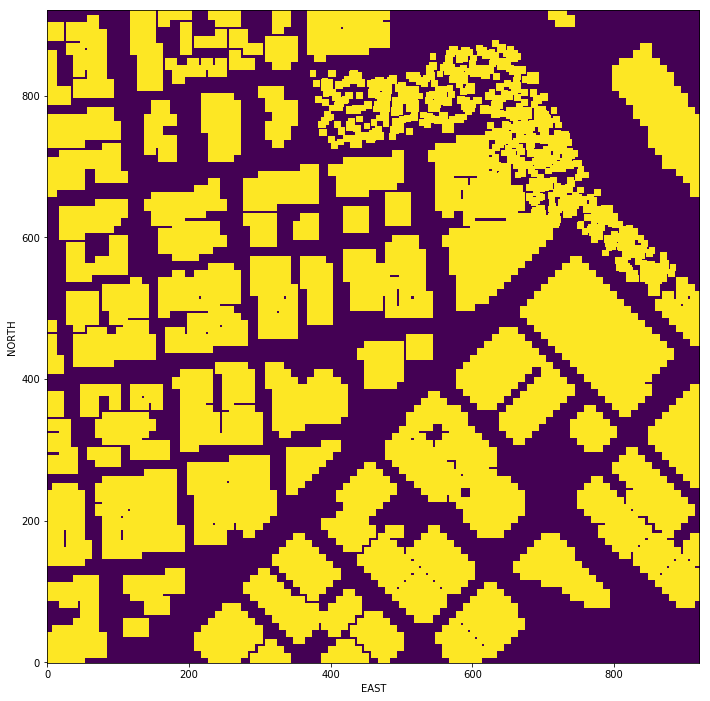

In [7]:
plt.rcParams['figure.figsize'] = 12, 12
filename='colliders.csv'
data=np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)
drone_altitude=5
safe_distance=3
grid=create_grid(data, drone_altitude, safe_distance)
plt.imshow(grid, origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Next you'll compute the path from a start location to a goal location using A*. Start and goal coordinates in *(north, east)*.

In [8]:
start_ne=(25, 100)
goal_ne=(750., 370.)

In [9]:
def heuristic_func(position, goal_position):
    return np.abs(position[0] - goal_position[0]) + np.abs(position[1] - goal_position[1])

In [10]:
path, cost = a_star(grid, heuristic_func, start_ne, goal_ne)
print(len(path), cost)

Found a path.
1024 1023.0


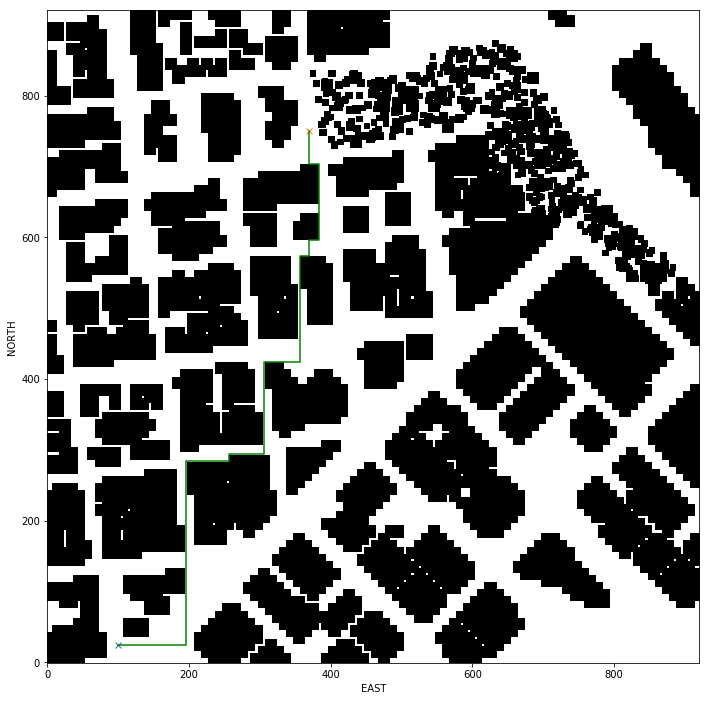

In [11]:
plt.imshow(grid, cmap='Greys', origin='lower')

# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Pretty neat! Unfortunately this path is impractical, the drone would be constantly stopping and going since each grid cell visited is synonymous with a waypoint. Ideally, we'd like to only consider a new waypoint when the drone's direction changes. Path pruning is one way to achieve this result.

#### Path Pruning

In [12]:
def point(p):
    return np.array([p[0], p[1], 1.]).reshape(1, -1)

def collinearity_check(p1, p2, p3, epsilon=1e-6):
    m=np.concatenate((p1, p2, p3), 0)
    det=np.linalg.det(m)
    return abs(det) < epsilon

Complete the `prune_path` function below. It should return a new path much shorter than the original.

In [13]:
# We're using collinearity here, but you could use Bresenham as well!
def prune_path(path):
    pruned_path=[p for p in path]
    # TODO: prune the path!
    i=0
    while i < len(pruned_path) - 2:
        p1=point(pruned_path[i])
        p2=point(pruned_path[i+1])
        p3=point(pruned_path[i+2])
        # If the 3 points are in a line remove
        # the 2nd point.
        # The 3rd point now becomes and 2nd point
        # and the check is redone with a new third point
        # on the next iteration.
        if collinearity_check(p1, p2, p3):
            # Something subtle here but we can mutate
            # `pruned_path` freely because the length
            # of the list is check on every iteration.
            pruned_path.remove(pruned_path[i+1])
        else:
            i += 1
    return pruned_path
            

In [14]:
pruned_path=prune_path(path)
print(len(pruned_path))

15


In [15]:
pruned_path

[(25, 100),
 (25, 196),
 (284, 196),
 (284, 256),
 (294, 256),
 (294, 306),
 (424, 306),
 (424, 356),
 (574, 356),
 (574, 370),
 (596, 370),
 (596, 384),
 (704, 384),
 (704, 370),
 (750.0, 370.0)]

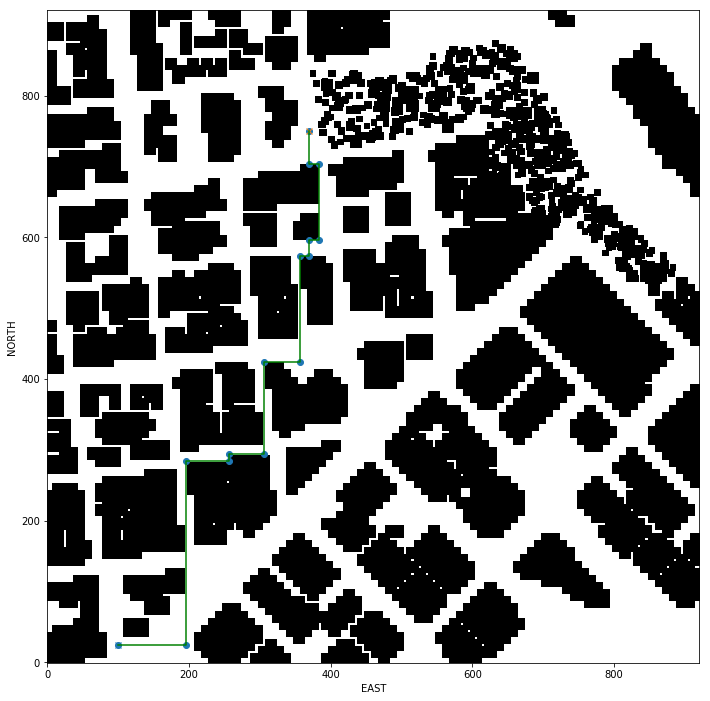

In [16]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')
pp=np.array(pruned_path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
plt.scatter(pp[:, 1], pp[:, 0])
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

#### Bresenham

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [19]:
def bres(p1, p2):
    """
    Note this solution requires `x1` < `x2` and `y1` < `y2`.
    """
    x1, y1 = p1
    x2, y2 = p2
    cells = []
    #Here's a quick explanation in math terms of our approach
    #First, set dx=x2-x1 and dy=y2-y1
    dx, dy = x2 - x1, y2 - y1
    #Then define a new quantity: d=xdy-ydx.
    #and set d=0 initially
    d = 0
    #The condition we care about is whether
    #(x+1)*m<y+1 or moving things around a bit:
    #(x+1)dy/dx<y+1
    #which implies: xdy-ydx<dx-dy
    #or in other words: d<dx-dy is our new condition
    
    #Initialize i, j indices
    i = x1
    j = y1
    while i < x2 and j < y2:
        cells.append([i, j])
        if d < dx - dy:
            d+=dy
            i+=1
        elif d == dx-dy:
            #uncomment these two lines for conservative approach
            #ceils.append([i+1,j])
            #ceils.append([i, j+1])
            d+=dy
            i+=1
            d-=dx
            j+=1
        else:
            d-=dx
            j+=1
    return np.array(cells)          

Plotting the line with the cells which it crosses. 

In [22]:
p1=(25, 100)
p2=(750, 370)
cells=bres(p1, p2)
print(cells)

[[ 25 100]
 [ 26 100]
 [ 27 100]
 ...
 [747 369]
 [748 369]
 [749 369]]


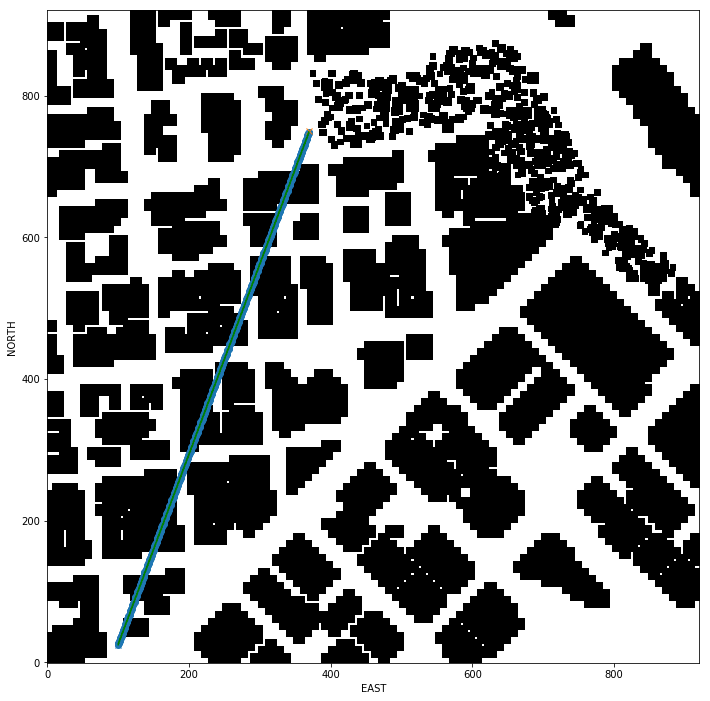

In [25]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.plot(p1[1], p1[0], 'x')
plt.plot(p2[1], p2[0], 'x')
pp=np.array(cells)
plt.plot(pp[:, 1], pp[:, 0], 'g')
plt.scatter(pp[:, 1], pp[:, 0])
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

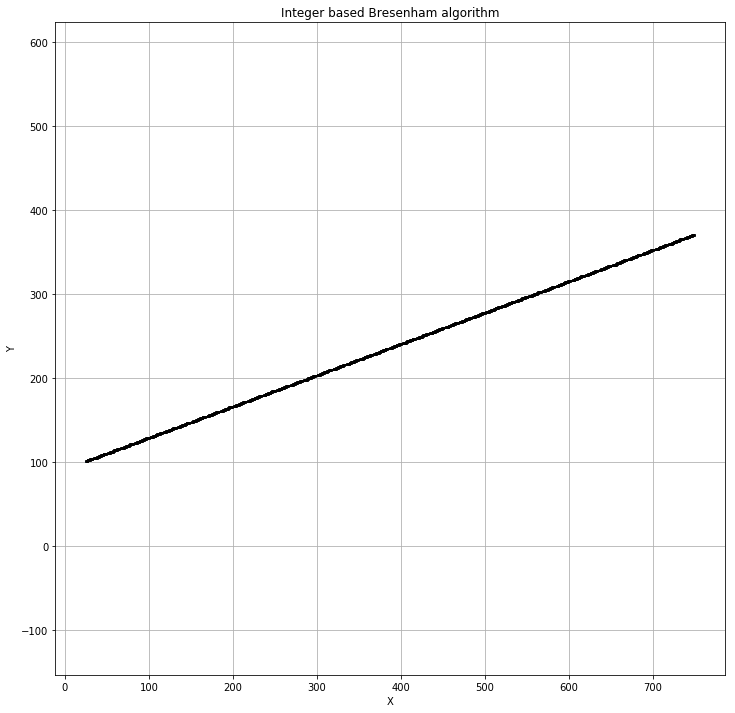

In [23]:
plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
for q in cells:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1], q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')
    
plt.grid()
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Integer based Bresenham algorithm")
plt.show()

#### Python Bresenham Package
For comparison let's have a look at the Python Bresenham package! As mentioned above, if you've added a safety margin around obstacles you are probably fine using this package or one like it that misses some cells in collision with the line.

First we need to import it:

In [27]:
from bresenham import bresenham

In [28]:
line=(0, 0, 7, 5)
cells=list(bresenham(line[0], line[1], line[2], line[3]))
print(cells)

[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (6, 4), (7, 5)]


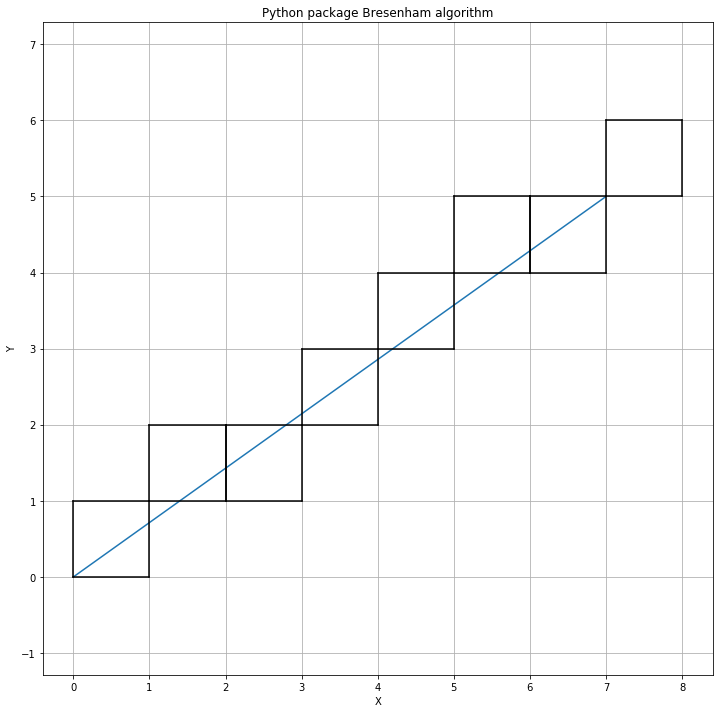

In [29]:
plt.plot([line[0], line[2]], [line[1], line[3]])


for q in cells:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Python package Bresenham algorithm")
plt.show()

[(2, 9), (3, 10), (4, 10), (5, 11), (6, 12), (7, 12), (8, 13), (9, 14), (10, 14), (11, 15), (12, 16), (13, 16), (14, 17), (15, 18), (16, 18), (17, 19), (18, 20), (19, 20), (20, 21), (21, 22), (22, 22), (23, 23), (24, 23), (25, 24), (26, 25), (27, 25), (28, 26), (29, 27), (30, 27), (31, 28), (32, 29), (33, 29), (34, 30), (35, 31), (36, 31), (37, 32), (38, 33), (39, 33), (40, 34), (41, 35), (42, 35), (43, 36), (44, 37), (45, 37), (46, 38), (47, 39), (48, 39), (49, 40), (50, 41), (51, 41), (52, 42), (53, 43), (54, 43), (55, 44), (56, 45), (57, 45), (58, 46), (59, 47), (60, 47), (61, 48), (62, 48), (63, 49), (64, 50), (65, 50), (66, 51), (67, 52), (68, 52), (69, 53), (70, 54), (71, 54), (72, 55), (73, 56), (74, 56), (75, 57), (76, 58), (77, 58), (78, 59)]


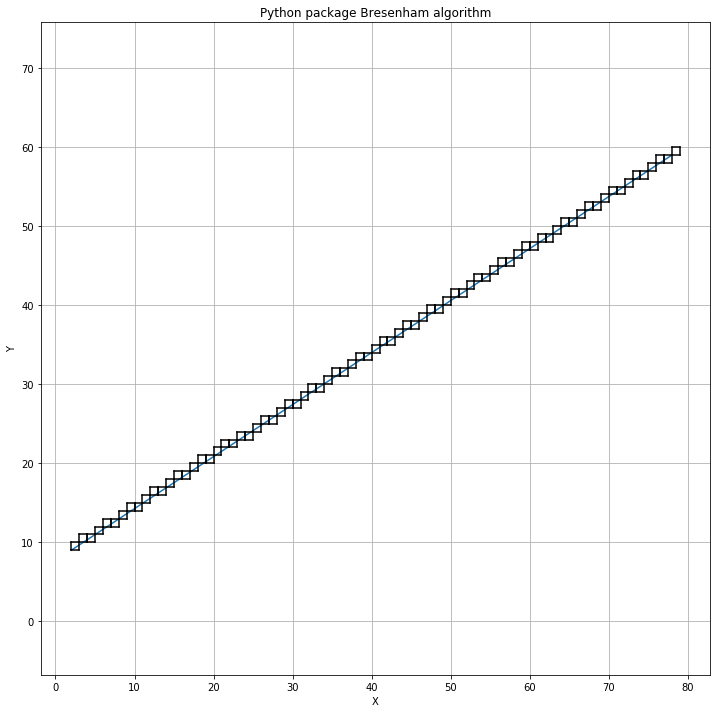

In [30]:
line = (2, 9, 78, 59)

cells = list(bresenham(line[0], line[1], line[2], line[3]))
print(cells)

plt.plot([line[0], line[2]], [line[1], line[3]])


for q in cells:
    plt.plot([q[0], q[0]+1], [q[1], q[1]], 'k')
    plt.plot([q[0], q[0]+1], [q[1]+1, q[1]+1], 'k')
    plt.plot([q[0], q[0]], [q[1],q[1]+1], 'k')
    plt.plot([q[0]+1, q[0]+1], [q[1], q[1]+1], 'k')

plt.grid()
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Python package Bresenham algorithm")
plt.show()

In [29]:
#uniform_cost algorithm's path can't describe in map
#path, cost=uniform_cost(grid, start_ne, goal_ne)
#print(len(path), cost)

Found a path.
1023 1023


In [31]:
#breadth_first algorithm has too many values to unpack (expected 2)
#path, cost=breadth_first(grid, start_ne, goal_ne)
#print(len(path), cost)

##### Executing the search

Run `uniform_cost()` and reference the grid to see if the path makes sense.

In [63]:
start=(0, 0)
goal=(4, 4)
grid = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0],
])

In [64]:
path, path_cost = uniform_cost(grid, start, goal)
print(path_cost, path)

Found a path.
14 [<Action.DOWN: (1, 0, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.UP: (-1, 0, 1)>, <Action.UP: (-1, 0, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.LEFT: (0, -1, 1)>]


In [65]:
# S -> start, G -> goal, O -> obstacle
visualize_path(grid, path, start)

array([['S', 'O', ' ', ' ', ' ', ' '],
       ['v', 'O', ' ', 'O', ' ', ' '],
       ['v', 'O', '>', '>', '>', 'v'],
       ['v', 'O', '^', ' ', 'O', 'v'],
       ['>', '>', '^', 'O', 'G', '<']], dtype='<U1')

In [70]:
start=(0,0)
goal=(5,5)

In [86]:
grid = np.array([
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0]
])

In [87]:
path, path_cost=uniform_cost(grid, start, goal)
print(path_cost, path)

Found a path.
10 [<Action.DOWN: (1, 0, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.DOWN: (1, 0, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.RIGHT: (0, 1, 1)>, <Action.RIGHT: (0, 1, 1)>]


In [88]:
visualize_path(grid, path, start)

array([['S', 'O', ' ', ' ', ' ', ' ', 'O', ' '],
       ['v', 'O', ' ', 'O', ' ', ' ', ' ', 'O'],
       ['v', 'O', ' ', ' ', ' ', ' ', 'O', 'O'],
       ['v', 'O', ' ', ' ', 'O', ' ', ' ', ' '],
       ['>', '>', 'v', 'O', ' ', ' ', ' ', 'O'],
       [' ', 'O', '>', '>', '>', 'G', 'O', 'O'],
       [' ', 'O', ' ', ' ', 'O', ' ', ' ', ' '],
       [' ', 'O', ' ', ' ', ' ', ' ', 'O', ' ']], dtype='<U1')

In [83]:
#random array is invalid
from numpy import random
grid=random.randint(0, 2, (8, 8))
grid

array([[1, 1, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0]])

In [2]:
lon = np.array([83.71666667, 83.7       , 83.6       , 83.65      , 83.6       ,
       83.88333333, 83.56666667, 83.88333333, 83.96666667, 83.75      ,
       83.7       , 83.1       , 83.21666667, 83.73333333, 83.65      ,
       83.4       , 83.56666667, 84.        , 83.78333333, 83.68333333,
       83.6       , 83.48333333, 83.3       , 83.38333333, 83.61666667,
       83.98333333, 83.43333333, 83.53333333, 84.05      , 84.21666667,
       83.15      , 83.06666667, 83.26666667, 83.25      , 83.8       ,
       84.9       , 84.36666667, 84.        , 83.88333333, 84.61666667,
       84.35      , 84.41666667, 84.61666667, 83.81666667, 84.11666667,
       83.81666667, 83.8       , 84.1       , 84.23333333, 84.28333333,
       83.96666667, 84.01666667, 83.8       , 84.61666667, 84.1       ,
       83.76666667, 84.13333333, 83.75      , 83.78333333, 83.91666667,
       85.        , 84.28333333, 84.41666667, 84.53333333, 85.13333333,
       85.05      , 85.01666667, 84.81666667, 84.98333333, 84.43333333,
       85.38333333, 84.81666667, 85.01666667, 84.93333333, 85.25      ,
       85.18333333, 85.31666667, 85.3       , 85.11666667, 85.41666667,
       85.25      , 85.54722   ])


In [3]:
lat = np.array([28.78333333, 28.75      , 28.26666667, 28.48333333, 28.63333333,
       28.81666667, 28.35      , 29.05      , 29.18333333, 28.18333333,
       28.21666667, 28.4       , 28.6       , 28.4       , 28.03333333,
       28.38333333, 28.15      , 29.1       , 28.96666667, 28.9       ,
       28.46666667, 28.38333333, 28.05      , 28.56666667, 28.13333333,
       29.18333333, 27.95      , 27.86666667, 27.68333333, 27.68333333,
       27.93333333, 27.55      , 28.01666667, 28.06666667, 27.86666667,
       28.36666667, 28.28333333, 28.21666667, 28.1       , 28.06666667,
       28.13333333, 27.93333333, 28.        , 27.88333333, 28.11666667,
       28.26666667, 28.3       , 28.03333333, 28.55      , 27.96666667,
       28.26666667, 28.06666667, 28.38333333, 28.2       , 28.36666667,
       27.98333333, 27.86666667, 28.26666667, 28.26666667, 28.08333333,
       28.48333333, 28.76666667, 27.61666667, 27.58333333, 27.55      ,
       27.41666667, 27.41666667, 27.55      , 27.43333333, 27.06666667,
       28.28333333, 28.05      , 27.91666667, 27.86666667, 27.8       ,
       27.71666667, 28.01666667, 28.1       , 28.01666667, 27.75      ,
       27.75      , 28.20946   ])

In [4]:
import utm
X = []
Y = []
for i in np.arange(len(lat)):
    LAT,LON,Z,S = utm.from_latlon(lat[i],lon[i])
    X = np.append(X,LON)
    Y = np.append (Y,LAT)

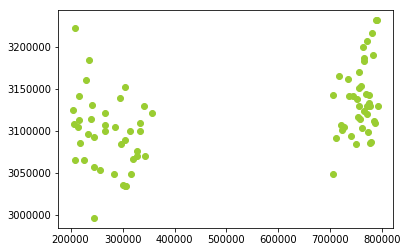

In [13]:
import matplotlib.pyplot as plt
plt.scatter (Y,X,color='yellowgreen')

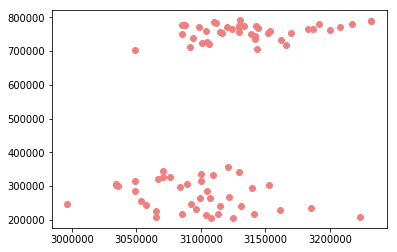

In [11]:
plt.scatter(X,Y,color='lightcoral')

In [9]:
import pyproj
from pyproj import Proj

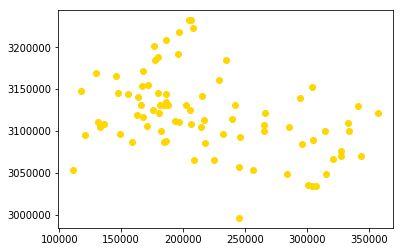

In [16]:
myProj = Proj("+proj=utm +zone=45U, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
lon_,lat_ = myProj(lon, lat) 
plt.scatter(lon_,lat_, color='gold')